In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from collections import Counter
import plotly.express as px
from sklearn.cluster import DBSCAN

## Loading Dataset

In [3]:
cleaned_online_retail_data_no_cancellations_no_outliers_for_clustering=pd.read_csv("cleaned_online_retail_data_no_cancellations_no_outliers_for_clustering.csv")


In [4]:
cleaned_online_retail_data_no_cancellations_no_outliers_for_clustering.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice(£),CustomerID,Country,Sales(£),InvoiceMonth,InvoiceDay,InvoiceHour,InvoiceWeekday,is_canceled
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30,12,1,8,2,False
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,12,1,8,2,False
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00,12,1,8,2,False
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,12,1,8,2,False
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,12,1,8,2,False


In [5]:
""""
Customer Segmentation
Actionable Plan:
Feature Engineering: Compute RFM values for each customer:
Recency: Days since the last purchase.
Frequency: Number of purchases.
Monetary: Total spending.
Use clustering algorithms such as K-Means, Hierarchical Clustering, or DBSCAN to group customers.
Assign intuitive labels (e.g., VIP, At-Risk) based on cluster characteristics.
Visualize customer groups using scatter plots (e.g., PCA or t-SNE for dimensionality reduction).
"""

'"\nCustomer Segmentation\nActionable Plan:\nFeature Engineering: Compute RFM values for each customer:\nRecency: Days since the last purchase.\nFrequency: Number of purchases.\nMonetary: Total spending.\nUse clustering algorithms such as K-Means, Hierarchical Clustering, or DBSCAN to group customers.\nAssign intuitive labels (e.g., VIP, At-Risk) based on cluster characteristics.\nVisualize customer groups using scatter plots (e.g., PCA or t-SNE for dimensionality reduction).\n'

# Clustering Techniques -- Customer Segmentation --KMEANS based on RFM

###  Creation of new Dataframe for RFM Analysis

In [6]:
"""""RFM stands for:
Recency: Days since the customer's last purchase.
Frequency: Total number of transactions by the customer.
Monetary: Total spending (sum of Sales) by the customer.
"""

'""RFM stands for:\nRecency: Days since the customer\'s last purchase.\nFrequency: Total number of transactions by the customer.\nMonetary: Total spending (sum of Sales) by the customer.\n'

In [7]:
# Ensure InvoiceDate is in datetime format
cleaned_online_retail_data_no_cancellations_no_outliers_for_clustering['InvoiceDate'] = pd.to_datetime(
    cleaned_online_retail_data_no_cancellations_no_outliers_for_clustering['InvoiceDate']
)

# Get the latest date in the dataset as a reference point
current_date = cleaned_online_retail_data_no_cancellations_no_outliers_for_clustering['InvoiceDate'].max()

# Compute RFM values
rfm = cleaned_online_retail_data_no_cancellations_no_outliers_for_clustering.groupby('CustomerID').agg({
    'InvoiceDate': lambda x: (current_date - x.max()).days,  # Recency in days
    'InvoiceNo': 'nunique',                                 # Frequency
    'Sales(£)': 'sum'                                       # Monetary value
}).rename(columns={
    'InvoiceDate': 'Recency',
    'InvoiceNo': 'Frequency',
    'Sales(£)': 'Monetary'
}).reset_index()

# Display RFM summary
rfm.head()


,CustomerID,Recency,Frequency,Monetary
0,12347.0,1,7,2783.37
1,12348.0,248,3,90.20
2,12349.0,18,1,939.75
3,12350.0,309,1,294.40
4,12352.0,35,7,1130.94


### Preparing the Data for Clustering

In [8]:
"""Normalize the RFM values to ensure all features are on the same scale (important for clustering)."""

'Normalize the RFM values to ensure all features are on the same scale (important for clustering).'

In [9]:

from sklearn.preprocessing import MinMaxScaler

# Normalize RFM values
scaler = MinMaxScaler()
rfm[['Recency', 'Frequency', 'Monetary']] = scaler.fit_transform(rfm[['Recency', 'Frequency', 'Monetary']])

print(rfm.head())  # Check the normalized values


   CustomerID   Recency  Frequency  Monetary
0     12347.0  0.002681   0.031088  0.039531
1     12348.0  0.664879   0.010363  0.001281
2     12349.0  0.048257   0.000000  0.013347
3     12350.0  0.828418   0.000000  0.004181
4     12352.0  0.093834   0.031088  0.016062


### Apply Clustering Algorithms


In [10]:
from sklearn.cluster import KMeans

# Determine the optimal number of clusters using the elbow method

kmeans = KMeans(n_clusters=4, random_state=42)
kmeans.fit(rfm[['Recency', 'Frequency', 'Monetary']])



c:\Users\godwi\Downloads\Anconda\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=4, random_state=42)

### Evaluation of K-Means (Finding the optimal number of clusters)

#### Elbow Method

In [11]:
from sklearn import metrics
from scipy.spatial.distance import cdist
import numpy as np

In [12]:
distortions = []
inertias = []
mapping1 = {}
mapping2 = {}
K = range(1, 10)

for k in K:
	# Building and fitting the model
	kmeanModel = KMeans(n_clusters=k).fit(rfm[['Recency', 'Frequency', 'Monetary']])
	kmeanModel.fit(rfm[['Recency', 'Frequency', 'Monetary']])

	distortions.append(sum(np.min(cdist(rfm[['Recency', 'Frequency', 'Monetary']], kmeanModel.cluster_centers_,
										'euclidean'), axis=1)) / rfm[['Recency', 'Frequency', 'Monetary']].shape[0])
	inertias.append(kmeanModel.inertia_)

	mapping1[k] = sum(np.min(cdist(rfm[['Recency', 'Frequency', 'Monetary']], kmeanModel.cluster_centers_,
								'euclidean'), axis=1)) / rfm[['Recency', 'Frequency', 'Monetary']].shape[0]
	mapping2[k] = kmeanModel.inertia_


c:\Users\godwi\Downloads\Anconda\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\godwi\Downloads\Anconda\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\godwi\Downloads\Anconda\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\godwi\Downloads\Anconda\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\godwi\Downloads

In [13]:
for key, val in mapping2.items():
	print(f'{key} : {val}')

1 : 305.5387568505252
2 : 68.84955652279979
3 : 36.71308192227202
4 : 24.027828860876944
5 : 17.50454514465471
6 : 14.383057575054126
7 : 11.185247188633104
8 : 9.296031699202805
9 : 7.920999073797324


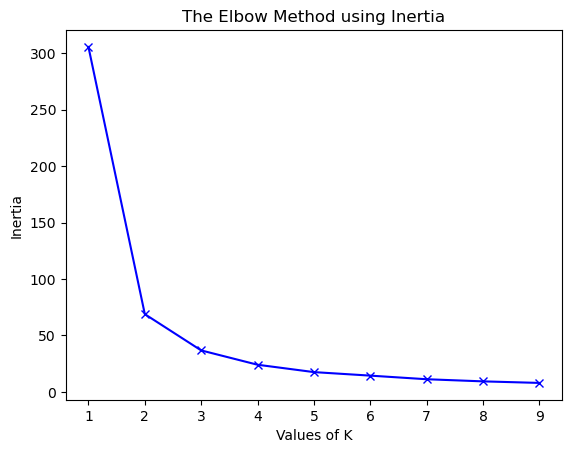

In [14]:
plt.plot(K, inertias, 'bx-')
plt.xlabel('Values of K')
plt.ylabel('Inertia')
plt.title('The Elbow Method using Inertia')
plt.show()


In [15]:
""""Inertia is a measure used in clustering, particularly in algorithms like K-Means, to evaluate the compactness of clusters.
Key Points:
Lower inertia indicates tighter, more cohesive clusters.
Inertia decreases as the number of clusters increases, as adding clusters reduces the average distance to centroids.
The Elbow Method uses inertia to find the optimal number of clusters, where the rate of decrease in inertia sharply diminishes (forming an "elbow")."""

'"Inertia is a measure used in clustering, particularly in algorithms like K-Means, to evaluate the compactness of clusters.\nKey Points:\nLower inertia indicates tighter, more cohesive clusters.\nInertia decreases as the number of clusters increases, as adding clusters reduces the average distance to centroids.\nThe Elbow Method uses inertia to find the optimal number of clusters, where the rate of decrease in inertia sharply diminishes (forming an "elbow").'

In [16]:
"""""4 Clusters appearsto be the optimal according to evaluation from Elbow Method using Inertia"""

'""4 Clusters appearsto be the optimal according to evaluation from Elbow Method using Inertia'

#### Silhouette Analysis

In [17]:
"""The Silhouette Score is a metric used to evaluate the quality of clustering. It measures how similar a data point is to its own cluster compared to other clusters, providing an indication of how well-defined the clusters are.
Characteristics:
Ranges from -1 to 1:
S(i)≈1: Point is well-clustered.
S(i)≈0: Point lies on the boundary of two clusters.
S(i)<0: Point is likely misclassified.
The mean silhouette score across all points in the dataset indicates the overall cluster quality. A higher score suggests well-separated and cohesive clusters.
"""""

'The Silhouette Score is a metric used to evaluate the quality of clustering. It measures how similar a data point is to its own cluster compared to other clusters, providing an indication of how well-defined the clusters are.\nCharacteristics:\nRanges from -1 to 1:\nS(i)≈1: Point is well-clustered.\nS(i)≈0: Point lies on the boundary of two clusters.\nS(i)<0: Point is likely misclassified.\nThe mean silhouette score across all points in the dataset indicates the overall cluster quality. A higher score suggests well-separated and cohesive clusters.\n'

c:\Users\godwi\Downloads\Anconda\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For n_clusters = 2, the average silhouette_score is 0.72153152730595


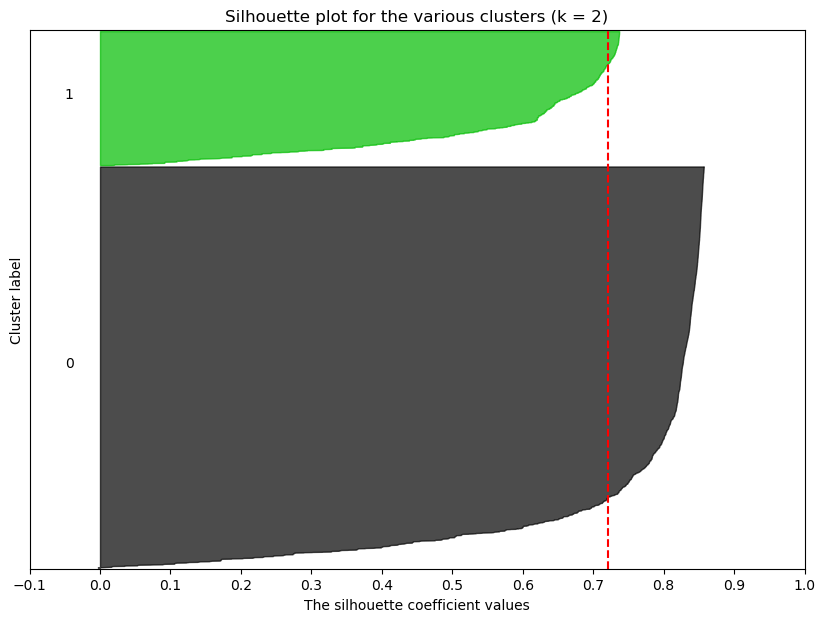

c:\Users\godwi\Downloads\Anconda\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For n_clusters = 3, the average silhouette_score is 0.6475485573592038


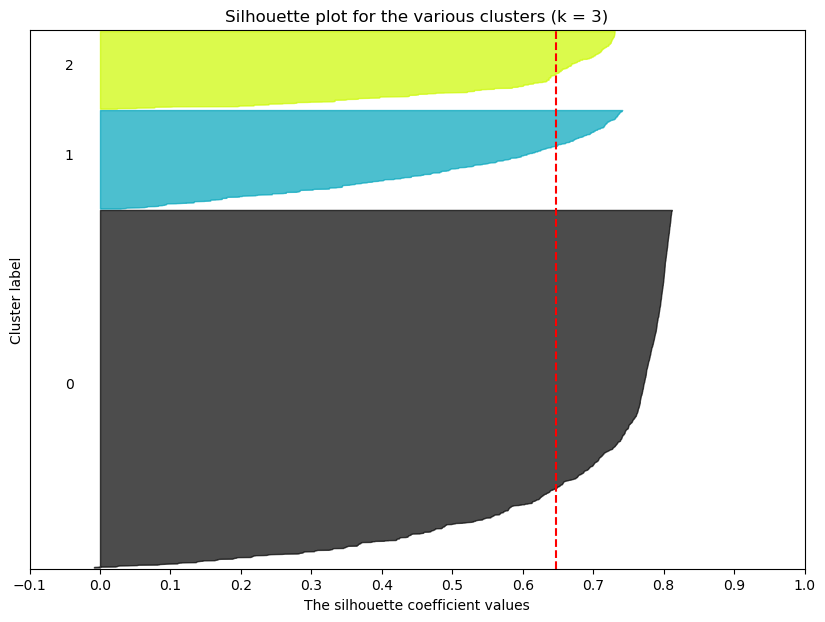

c:\Users\godwi\Downloads\Anconda\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For n_clusters = 4, the average silhouette_score is 0.5555249742884635


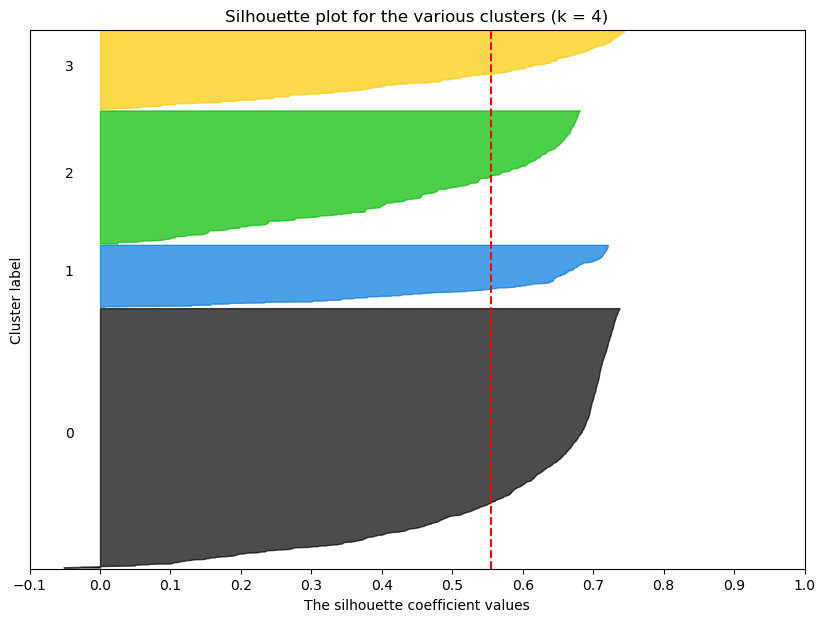

c:\Users\godwi\Downloads\Anconda\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For n_clusters = 5, the average silhouette_score is 0.5420717223461972


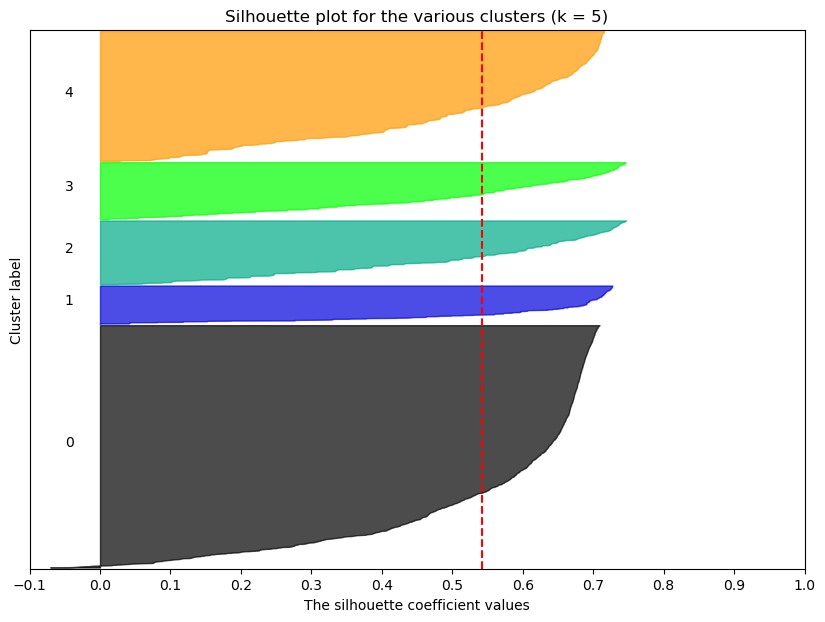

c:\Users\godwi\Downloads\Anconda\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For n_clusters = 6, the average silhouette_score is 0.5481481971882675


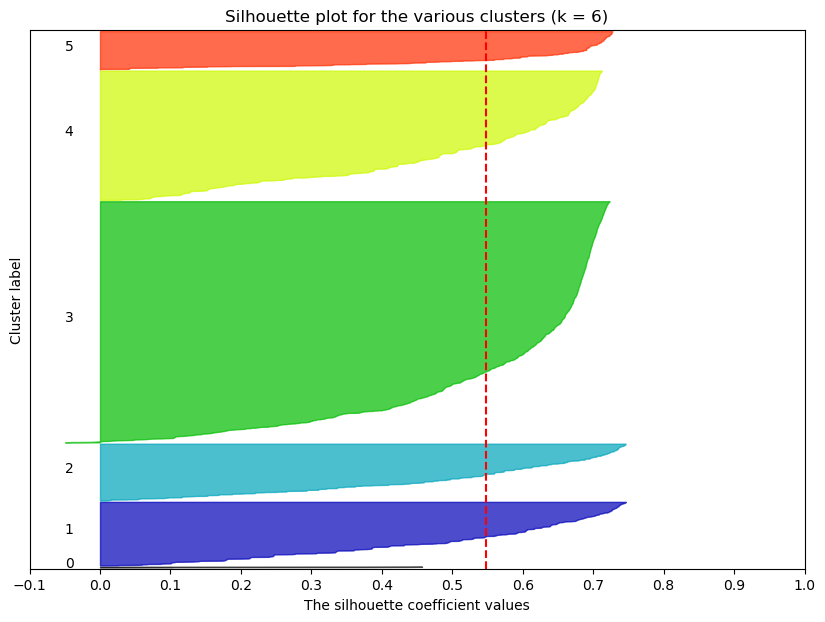

c:\Users\godwi\Downloads\Anconda\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For n_clusters = 7, the average silhouette_score is 0.5402576683984515


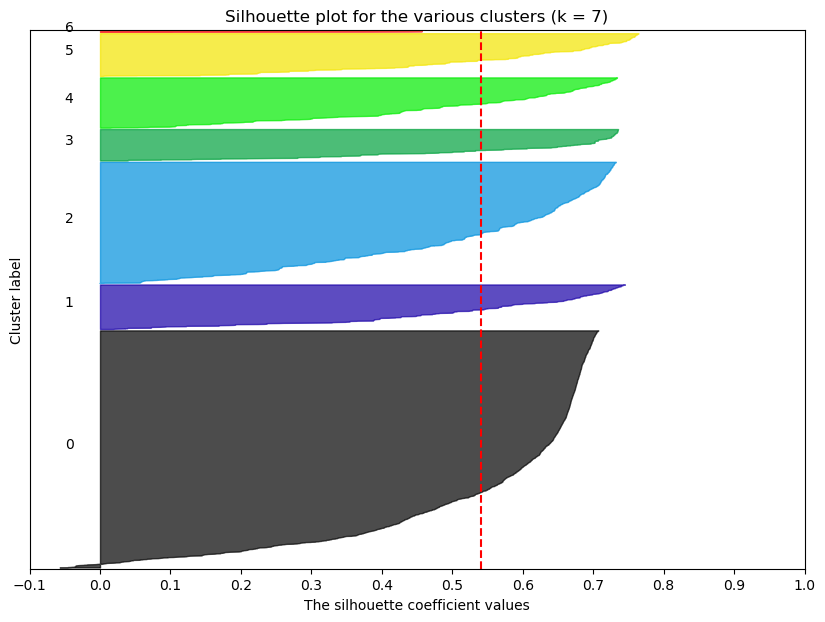

c:\Users\godwi\Downloads\Anconda\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For n_clusters = 8, the average silhouette_score is 0.46440936656369036


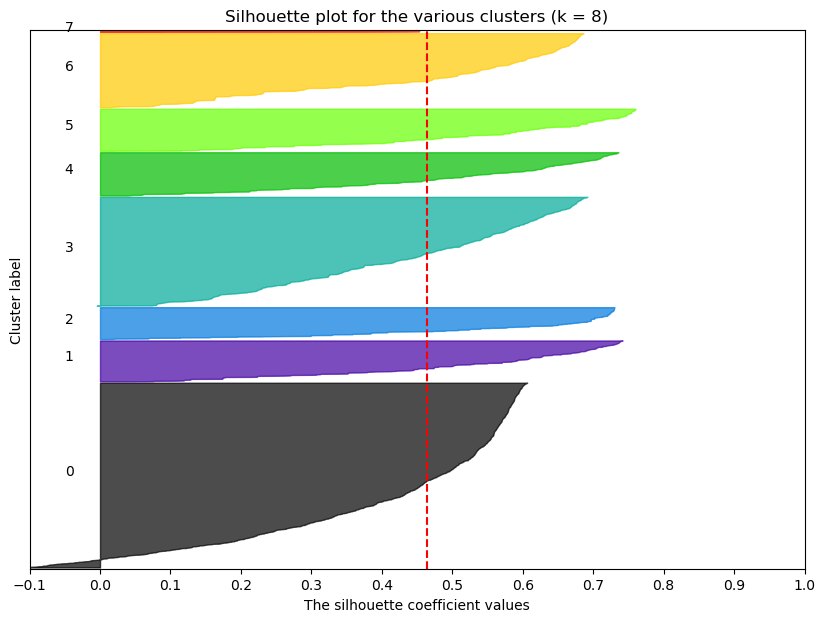

c:\Users\godwi\Downloads\Anconda\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For n_clusters = 9, the average silhouette_score is 0.4721114535740094


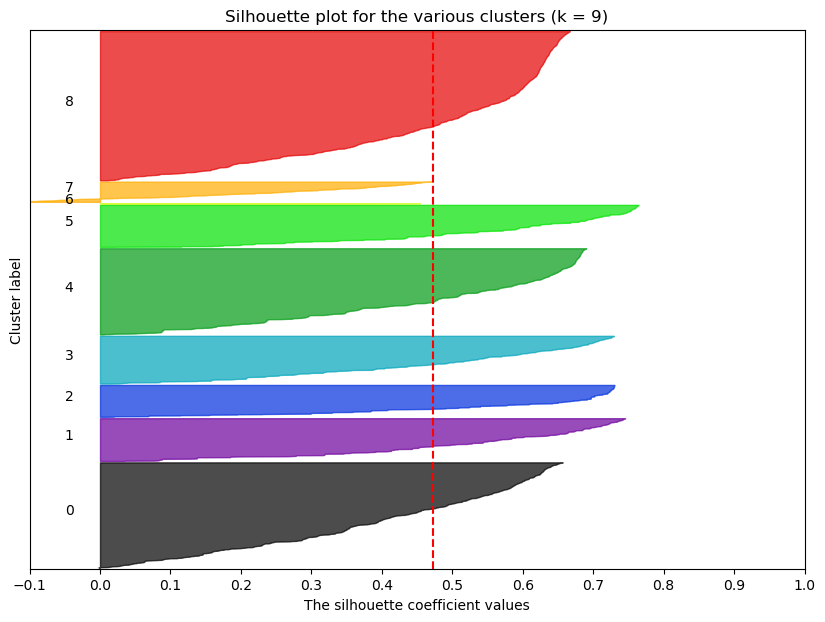

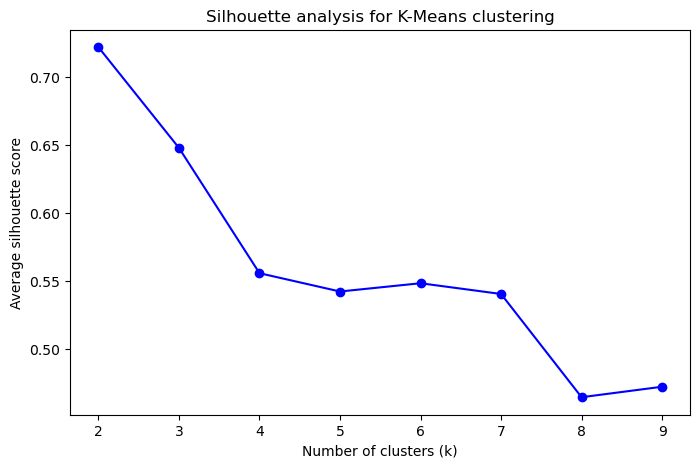

In [18]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, silhouette_samples
import numpy as np

# Create a range of values for k
k_range = range(2, 10)

# Initialize lists to store the average silhouette scores for each k
silhouette_avg_scores = []

# Fit the data for each k value and calculate silhouette scores
for k in k_range:
    kmeans = KMeans(n_clusters=k, init='k-means++', max_iter=50, random_state=42)
    cluster_labels = kmeans.fit_predict(rfm[['Recency', 'Frequency', 'Monetary']])
    
    silhouette_avg = silhouette_score(rfm[['Recency', 'Frequency', 'Monetary']], cluster_labels)
    silhouette_avg_scores.append(silhouette_avg)
    
    print(f"For n_clusters = {k}, the average silhouette_score is {silhouette_avg}")

    # Create a subplot with 1 row and 2 columns
    fig, ax1 = plt.subplots(1, 1)
    fig.set_size_inches(10, 7)

    ax1.set_xlim([-0.1, 1])
    ax1.set_ylim([0, len(rfm[['Recency', 'Frequency', 'Monetary']]) + (k + 1) * 10])

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(rfm[['Recency', 'Frequency', 'Monetary']], cluster_labels)

    y_lower = 10
    for i in range(k):
        ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]
        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = plt.cm.nipy_spectral(float(i) / k)
        ax1.fill_betweenx(np.arange(y_lower, y_upper), 0, ith_cluster_silhouette_values, facecolor=color, edgecolor=color, alpha=0.7)
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        y_lower = y_upper + 10

    ax1.set_title(f"Silhouette plot for the various clusters (k = {k})")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")
    ax1.set_yticks([])
    ax1.set_xticks([i / 10.0 for i in range(-1, 11)])
    plt.show()

# Plot the average silhouette scores for each k
plt.figure(figsize=(8, 5))
plt.plot(k_range, silhouette_avg_scores, 'bo-')
plt.title('Silhouette analysis for K-Means clustering')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Average silhouette score')
plt.show()


### Train Model

In [19]:
# k-means with appropriate value of k
kmeans = KMeans(n_clusters=4, max_iter=50)
# Fit K-Means clustering
kmeans.fit(rfm[['Recency', 'Frequency', 'Monetary']])

c:\Users\godwi\Downloads\Anconda\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(max_iter=50, n_clusters=4)

c:\Users\godwi\Downloads\Anconda\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


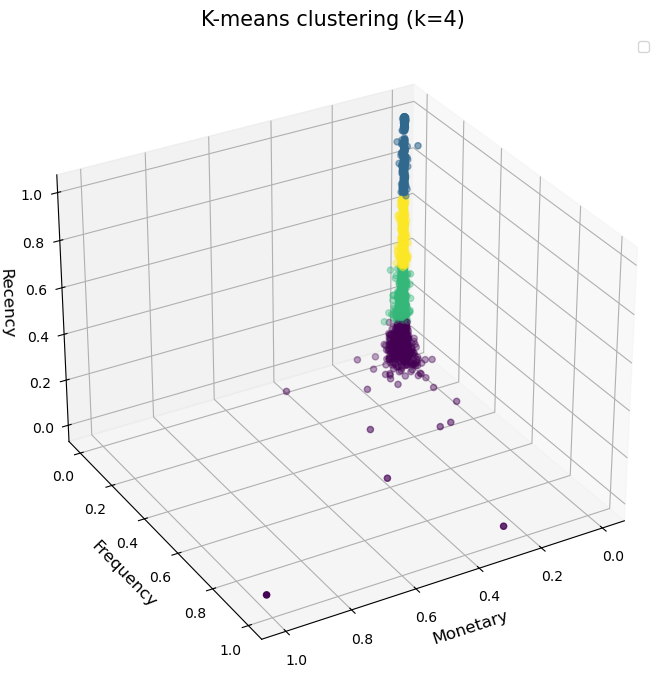

In [20]:
# Fit K-means clustering
k = 4
kmeans = KMeans(n_clusters=k, random_state=42)
y_kmeans = kmeans.fit_predict(rfm[['Recency', 'Frequency', 'Monetary']])

# 3D scatter plot
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')
scatter = ax.scatter(rfm['Monetary'], 
                     rfm['Frequency'], 
                     rfm['Recency'], 
                     c=y_kmeans, cmap='viridis')


# Add labels and title
ax.set_xlabel('Monetary', fontsize=12)
ax.set_ylabel('Frequency', fontsize=12)
ax.set_zlabel('Recency', fontsize=12)
ax.set_title('K-means clustering (k={})'.format(k), fontsize=15)
ax.legend()

# Adjust view angle
ax.view_init(elev=30, azim=60)

# Adjust layout to ensure labels are fully visible
fig.tight_layout()

plt.show()

In [ ]:

# Fit K-means clustering
k = 4
kmeans = KMeans(n_clusters=k, random_state=42)
y_kmeans = kmeans.fit_predict(rfm[['Recency', 'Frequency', 'Monetary']])

# Assign the cluster labels to rfm DataFrame
rfm['Cluster_Id'] = y_kmeans

# Display the first few rows of rfm
print(rfm.head())

# Create a DataFrame for centroids
centers = kmeans.cluster_centers_
centers_df = pd.DataFrame(centers, columns=['Monetary', 'Frequency', 'Recency'])
centers_df['Cluster'] = ['Centroid']*len(centers_df)

# Create the 3D scatter plot
fig = px.scatter_3d(rfm, x='Monetary', y='Frequency', z='Recency', 
                    color='Cluster_Id', symbol='Cluster_Id', title=f'K-means Clustering (k={k})',
                    labels={'Monetary': 'Monetary', 'Frequency': 'Frequency', 'Recency': 'Recency'},
                    opacity=0.7)


# Update layout to increase figure size and customize legend
fig.update_layout(
    scene=dict(
        xaxis_title='Monetary',
        yaxis_title='Frequency',
        zaxis_title='Recency'
    ),
    width=1200,
    height=800,
    legend=dict(
        x=1.125,
        y=1,
        bgcolor='rgba(255, 255, 255, 0.5)',
        bordercolor='Black',
        borderwidth=1
    )
)

# Show the plot
fig.show()


c:\Users\godwi\Downloads\Anconda\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [ ]:
# Apply K-Means with the optimal number of clusters (e.g., k=4)
optimal_k = 4  # Based on the elbow method
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
rfm['Cluster'] = kmeans.fit_predict(rfm[['Recency', 'Frequency', 'Monetary']])

c:\Users\godwi\Downloads\Anconda\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



### Assign Intuitive Labels


In [ ]:
# Assign labels manually based on analysis of cluster centers
rfm['Cluster_Label'] = rfm['Cluster'].map({
    0: 'VIP',
    1: 'Loyal',
    2: 'At-Risk',
    3: 'Churned'  # Example mapping; adjust based on actual results
})

print(rfm[['CustomerID', 'Cluster', 'Cluster_Label']].head())


   CustomerID  Cluster Cluster_Label
0     12347.0        0           VIP
1     12348.0        1         Loyal
2     12349.0        0           VIP
3     12350.0        1         Loyal
4     12352.0        0           VIP


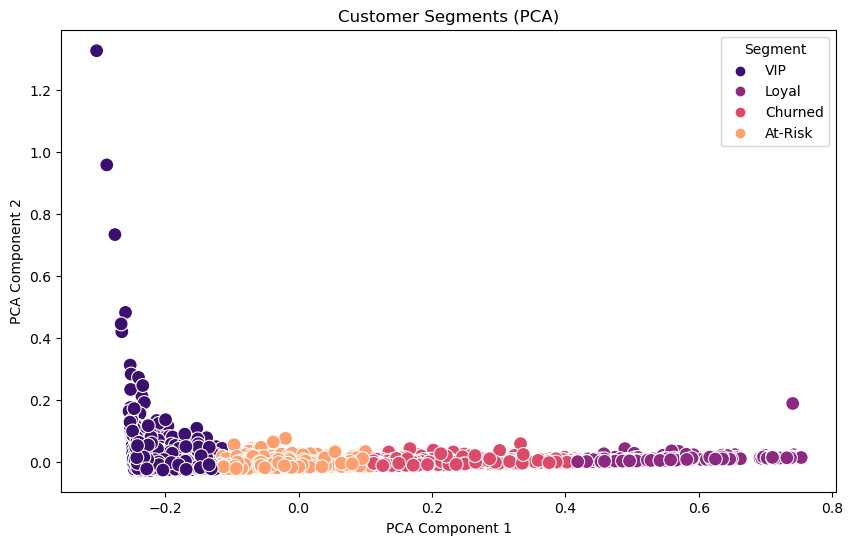

In [ ]:
from sklearn.decomposition import PCA

# Apply PCA to reduce dimensionality for visualization
pca = PCA(n_components=2)
rfm_pca = pca.fit_transform(rfm[['Recency', 'Frequency', 'Monetary']])
rfm['PCA1'] = rfm_pca[:, 0]
rfm['PCA2'] = rfm_pca[:, 1]

# Scatter plot of clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(data=rfm, x='PCA1', y='PCA2', hue='Cluster_Label', palette='magma', s=100)
plt.title('Customer Segments (PCA)')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.legend(title='Segment')
plt.show()


In [ ]:

# Map cluster numbers to meaningful labels
label_mapping = {
    0: 'VIP',    
    1: 'Loyal',
    2: 'At-Risk',
    3: 'At High Risk Or Churned'
}

# Add cluster labels to the DataFrame
rfm['Cluster_Label'] = rfm['Cluster'].map(label_mapping)

# Select relevant columns to form the final DataFrame
final_df = rfm[['CustomerID', 'Recency', 'Frequency', 'Monetary', 'Cluster', 'Cluster_Label']]

# Display the final DataFrame
final_df.head()


NameError: name 'rfm' is not defined

In [ ]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4147 entries, 0 to 4146
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   CustomerID     4147 non-null   float64
 1   Recency        4147 non-null   float64
 2   Frequency      4147 non-null   float64
 3   Monetary       4147 non-null   float64
 4   Cluster        4147 non-null   int32  
 5   Cluster_Label  4147 non-null   object 
dtypes: float64(4), int32(1), object(1)
memory usage: 178.3+ KB


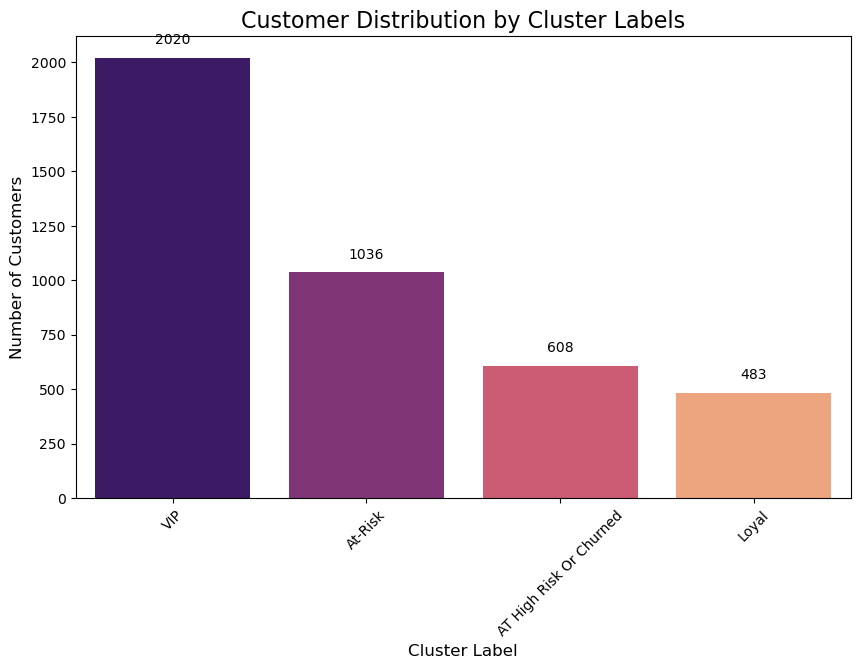

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming `final_df` contains the clustering results and `Cluster_Label` column
label_counts = final_df['Cluster_Label'].value_counts()

# Bar Chart
plt.figure(figsize=(10, 6))
sns.barplot(x=label_counts.index, y=label_counts.values, palette='magma')
plt.title('Customer Distribution by Cluster Labels', fontsize=16)
plt.xlabel('Cluster Label', fontsize=12)
plt.ylabel('Number of Customers', fontsize=12)
plt.xticks(rotation=45)

# Add labels to the bars
for index, value in enumerate(label_counts.values):
    plt.text(index, value + 50, str(value), ha='center', va='bottom', fontsize=10)  # You can adjust the "50" as needed for better placement

plt.show()


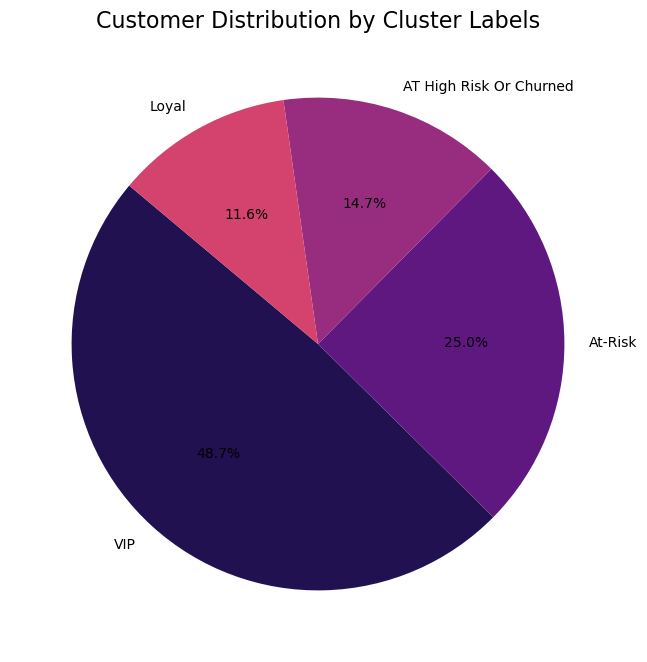

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming `final_df` contains the clustering results and `Cluster_Label` column
label_counts = final_df['Cluster_Label'].value_counts()


# Pie Chart
plt.figure(figsize=(8, 8))
plt.pie(label_counts.values, labels=label_counts.index, autopct='%1.1f%%', startangle=140, colors=sns.color_palette('magma'))
plt.title('Customer Distribution by Cluster Labels', fontsize=16)
plt.show()


## Customer Segmentation Insights:

### Loyal Customers (11.6%):



Description: About 11.6% of customers are categorized as Loyal Customers. These customers are consistent in their purchasing behavior, demonstrating high retention and repeat purchases over time.



Recommendation: To further increase loyalty, businesses can consider rewarding these customers with exclusive offers, loyalty programs, or personalized discounts to ensure continued engagement.



### At-Risk Customers (25.0%):

Description: 25.0% of customers are classified as At-Risk. These customers may be showing signs of disengagement or reduced spending, and there’s a risk they might churn soon if not re-engaged.


Recommendation: A targeted retention strategy should be implemented for these customers, including personalized communication, re-engagement offers (e.g., discounts or special deals), and addressing any possible customer service issues that might be causing the decline in interaction.


### VIP Customers (48.7%):

Description: 48% of customers are classified as VIP based on their recent, frequent, and high-value purchases. This group could represent wholesalers or businesses making bulk purchases.



Recommendation: Focus on nurturing this high-value group with personalized services, exclusive offers, and possibly setting up business partnerships to maintain their loyalty and boost overall revenue.


### At High-Risk or Churned Customers (14.7%):

Description: Approximately 14.7% of customers are categorized as At High-Risk or Churned. These customers are either at risk of leaving or have already stopped interacting with the business.


Recommendation: Immediate attention is required for this group. Consider strategies such as re-engagement emails, offering incentives to return, and analyzing past behavior to understand reasons for disengagement and offer solutions.
